<a href="https://colab.research.google.com/github/ducvu/ml_projects/blob/master/newbornweight_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [91]:
filename = '/content/data_all_update.xlsx'
df = pd.read_excel(filename)

In [92]:
df.head(5)

,năm sinh,Cân nặng,Chiều cao,BMI,Tuần thai,BC,CHBC,Hct,Hb,MCV,MCH,MCHC,Mao mạch,BPD,AC,FL,Sexe,Weight
0,1982,63.0,1.50,28.00,11.4,4.36,12.60,36.9,84.6,28.8,34.1,34.1,100.0,92.0,350.0,74.0,Male,3600
1,1999,46.0,1.59,28.90,24.0,6.78,4.61,12.9,37.4,81.2,28.1,34.6,75.0,NaN,NaN,NaN,Female,350
2,2001,45.0,1.53,19.00,25.0,14.8,4.45,12.9,37,83.1,28.9,34.8,71.0,NaN,NaN,NaN,Male,800
3,1998,47.0,1.45,22.35,26.0,12.8,3.62,10.9,32.8,90.4,30.0,33.2,85.0,NaN,NaN,NaN,Male,900
4,1992,45.0,1.45,21.40,26.0,6.6,4.17,30.3,9.6,72.8,23.0,31.5,86.0,70.0,241.0,49.0,Female,1200


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   năm sinh   2517 non-null   int64  
 1   Cân nặng   2517 non-null   float64
 2   Chiều cao  2517 non-null   float64
 3   BMI        2304 non-null   float64
 4   Tuần thai  2516 non-null   float64
 5   BC         2516 non-null   object 
 6   CHBC       2516 non-null   float64
 7   Hct        2516 non-null   float64
 8   Hb         2516 non-null   object 
 9   MCV        2516 non-null   float64
 10  MCH        2516 non-null   float64
 11  MCHC       2515 non-null   object 
 12  Mao mạch   2460 non-null   float64
 13  BPD        2267 non-null   float64
 14  AC         2247 non-null   float64
 15  FL         2166 non-null   float64
 16  Sexe       2517 non-null   object 
 17  Weight     2517 non-null   int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 354.1+ KB


There're 3 numerical columns but still are 'object' type : BC, Hb, MCHC

In [94]:
x = df[["BC","Hb","MCHC"]]

# find the not numeric rows
x[~x.applymap(np.isreal).all(1)]

,BC,Hb,MCHC
882,11.7,36.8,.35.9
1131,9.69,.36.7,33.4
1148,8.8,.36.5,34.2
2070,8..12,31.9,32.6


There're error in data input. Make the replace manually then force them to numeric.

In [95]:
df["BC"].replace({"8..12": "8.12"}, inplace=True)
df["Hb"].replace({".36.7": "36.7"}, inplace=True)
df["Hb"].replace({".36.5": "36.5"}, inplace=True)
df["MCHC"].replace({".35.9": "35.9"}, inplace=True)

df["BC"] = df["BC"].astype('float64')
df["Hb"] = df["Hb"].astype('float64')
df["MCHC"] = df["MCHC"].astype('float64')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   năm sinh   2517 non-null   int64  
 1   Cân nặng   2517 non-null   float64
 2   Chiều cao  2517 non-null   float64
 3   BMI        2304 non-null   float64
 4   Tuần thai  2516 non-null   float64
 5   BC         2516 non-null   float64
 6   CHBC       2516 non-null   float64
 7   Hct        2516 non-null   float64
 8   Hb         2516 non-null   float64
 9   MCV        2516 non-null   float64
 10  MCH        2516 non-null   float64
 11  MCHC       2515 non-null   float64
 12  Mao mạch   2460 non-null   float64
 13  BPD        2267 non-null   float64
 14  AC         2247 non-null   float64
 15  FL         2166 non-null   float64
 16  Sexe       2517 non-null   object 
 17  Weight     2517 non-null   int64  
dtypes: float64(15), int64(2), object(1)
memory usage: 354.1+ KB


Next create a dummy variable for Sexe column

In [97]:
df = pd.get_dummies(df, columns=["Sexe"])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   năm sinh     2517 non-null   int64  
 1   Cân nặng     2517 non-null   float64
 2   Chiều cao    2517 non-null   float64
 3   BMI          2304 non-null   float64
 4   Tuần thai    2516 non-null   float64
 5   BC           2516 non-null   float64
 6   CHBC         2516 non-null   float64
 7   Hct          2516 non-null   float64
 8   Hb           2516 non-null   float64
 9   MCV          2516 non-null   float64
 10  MCH          2516 non-null   float64
 11  MCHC         2515 non-null   float64
 12  Mao mạch     2460 non-null   float64
 13  BPD          2267 non-null   float64
 14  AC           2247 non-null   float64
 15  FL           2166 non-null   float64
 16  Weight       2517 non-null   int64  
 17  Sexe_Female  2517 non-null   uint8  
 18  Sexe_Male    2517 non-null   uint8  
dtypes: flo

All the data now are numeric type. Then I will remove the outliers, then fill the null with the mean of each column (without the outliers)

In [99]:
print("NB null values = ",df.isnull().sum().max())

NB null values =  351


# Data visualization

In [100]:
def print_low_high(x, nlow, nhigh):
  x.sort(reverse=True)
  print(x[0:10])
  x.sort(reverse=False)
  print(x[0:10])

In [114]:
x = df['CHBC'].tolist()
print_low_high(x, 10,10)

[40.1, 39.95, 14.47, 12.1, 11.7, 9.4, 6.7, 6.7, 6.21, 6.17]
[2.56, 3.04, 3.07, 3.11, 3.12, 3.15, 3.16, 3.18, 3.19, 3.19]


In [115]:
colname = 'năm sinh'
index = df[(df[colname] < 1970) | (df[colname] > 2004)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True)

colname = 'Cân nặng'
index = df[(df[colname] < 36)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True)

colname = 'Tuần thai'
index = df[(df[colname] < 24)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True)

colname = 'BC'
index = df[(df[colname] > 30)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True) 

colname = 'MCV'
index = df[(df[colname] > 100)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True)    

colname = 'CHBC'
index = df[(df[colname] > 15)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True)     

colname = 'Hct'
index = df[(df[colname] > 50)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True) 

colname = 'MCHC'
index = df[(df[colname] > 200)].index
if (index.shape[0] >0):
  df.drop(index, inplace=True) 

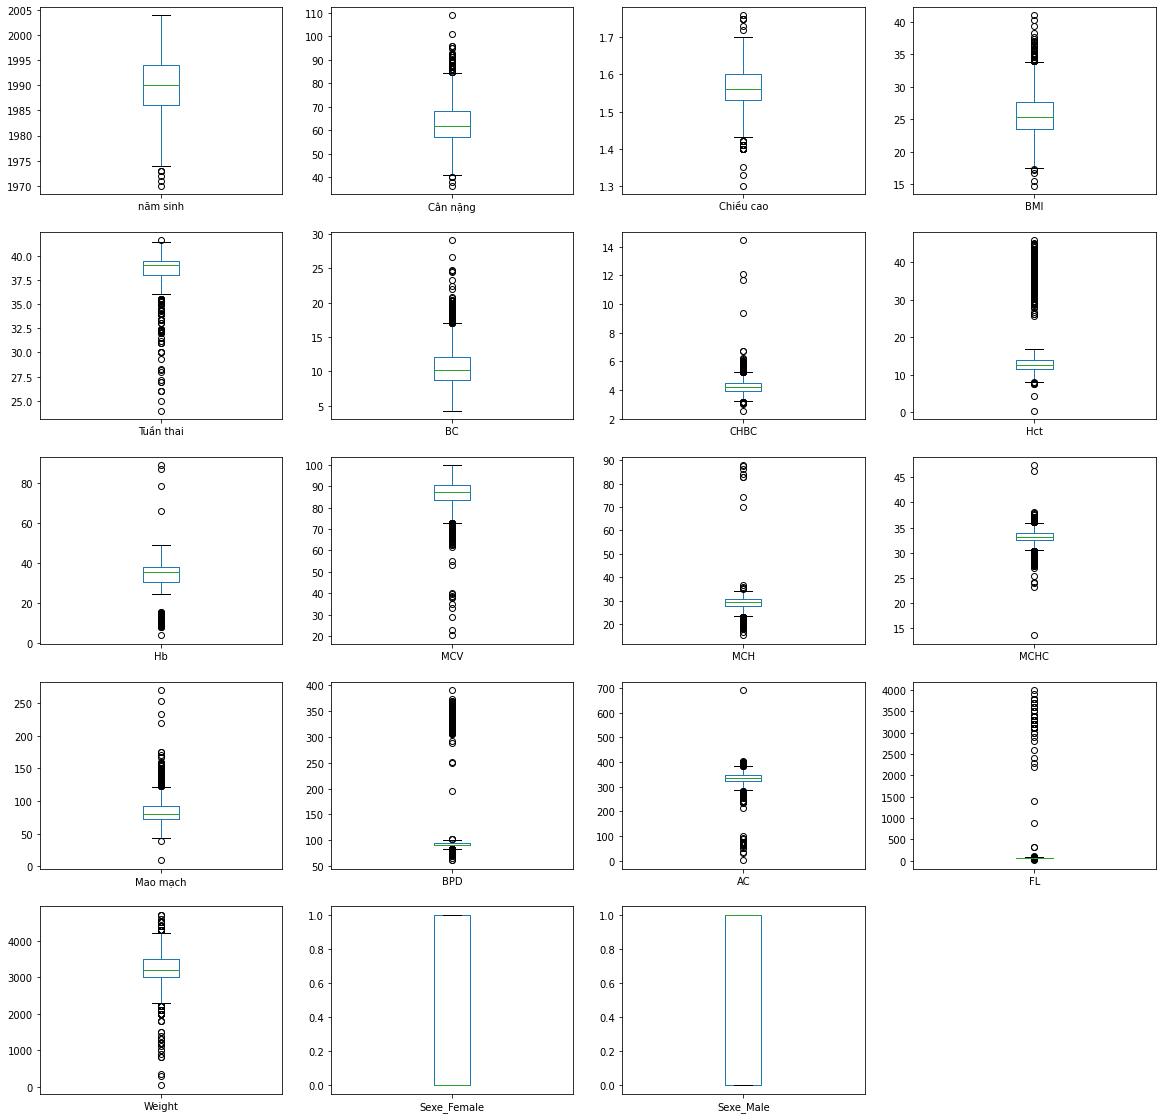

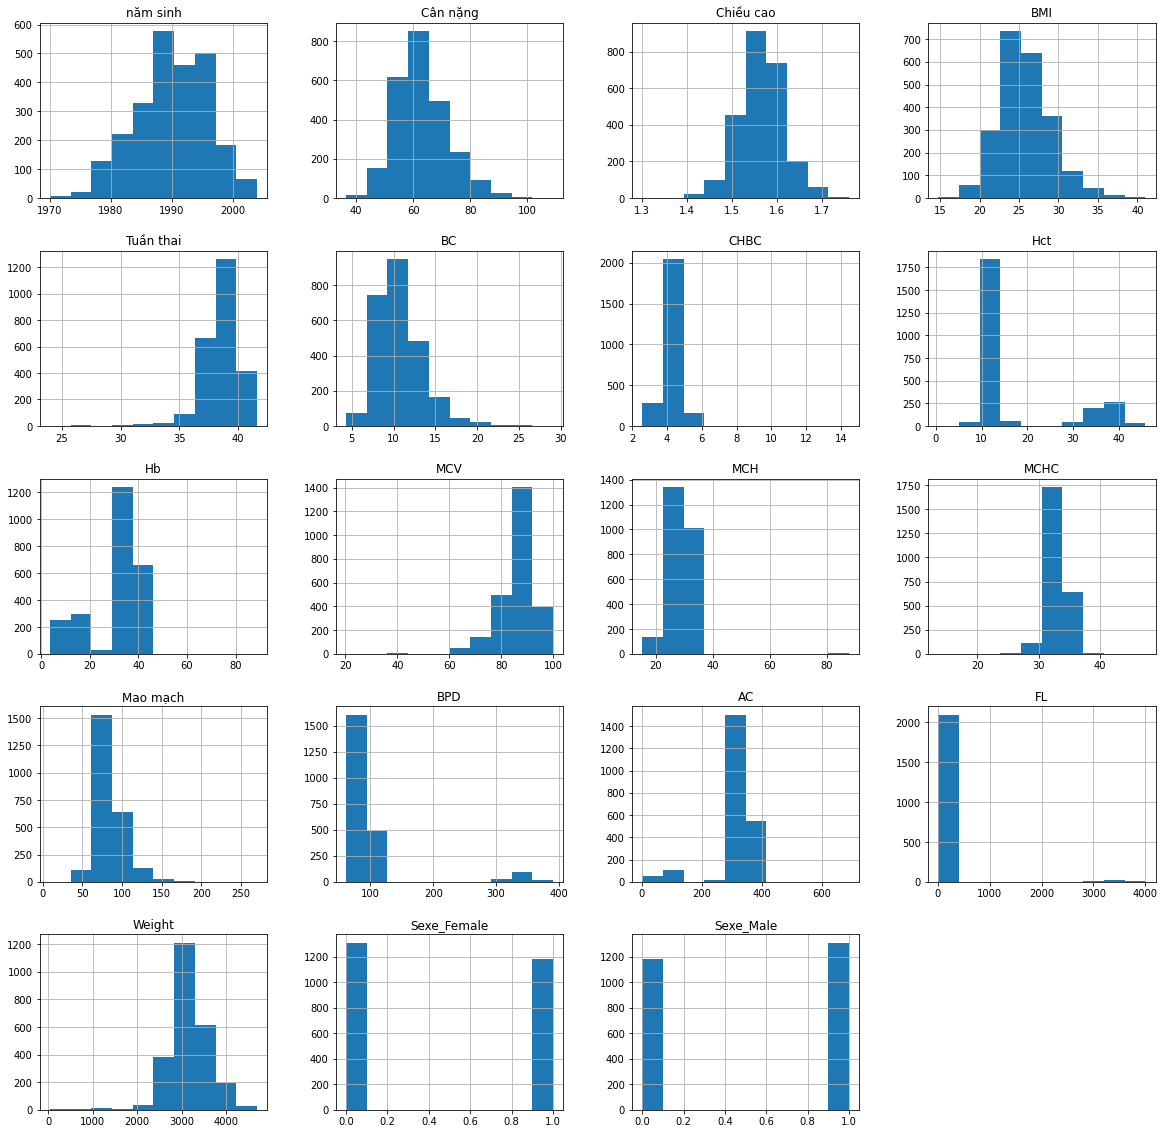

In [116]:
# Box plot
df.plot(kind='box', layout=(5,4), figsize=(20, 20), subplots=True, sharex=False, sharey=False)
pyplot.show()

# Histogram
df.hist(layout=(5,4), figsize=(20, 20))
pyplot.show()

In [122]:
# fill null by mean of column
df = df.fillna(df_scale.mean())
print("NB null values = ",df.isnull().sum().max())

# move target column to the end of dataframe
x = df.pop('Weight') 
df['Weight']=x
print(df.info())

NB null values =  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 1 to 2516
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   năm sinh     2492 non-null   int64  
 1   Cân nặng     2492 non-null   float64
 2   Chiều cao    2492 non-null   float64
 3   BMI          2492 non-null   float64
 4   Tuần thai    2492 non-null   float64
 5   BC           2492 non-null   float64
 6   CHBC         2492 non-null   float64
 7   Hct          2492 non-null   float64
 8   Hb           2492 non-null   float64
 9   MCV          2492 non-null   float64
 10  MCH          2492 non-null   float64
 11  MCHC         2492 non-null   float64
 12  Mao mạch     2492 non-null   float64
 13  BPD          2492 non-null   float64
 14  AC           2492 non-null   float64
 15  FL           2492 non-null   float64
 16  Sexe_Female  2492 non-null   uint8  
 17  Sexe_Male    2492 non-null   uint8  
 18  Weight       2492 non-null  

Next I look at the correlation matrix; nothing is too correlated with target variable. Some cols with strong correlation --> TODO

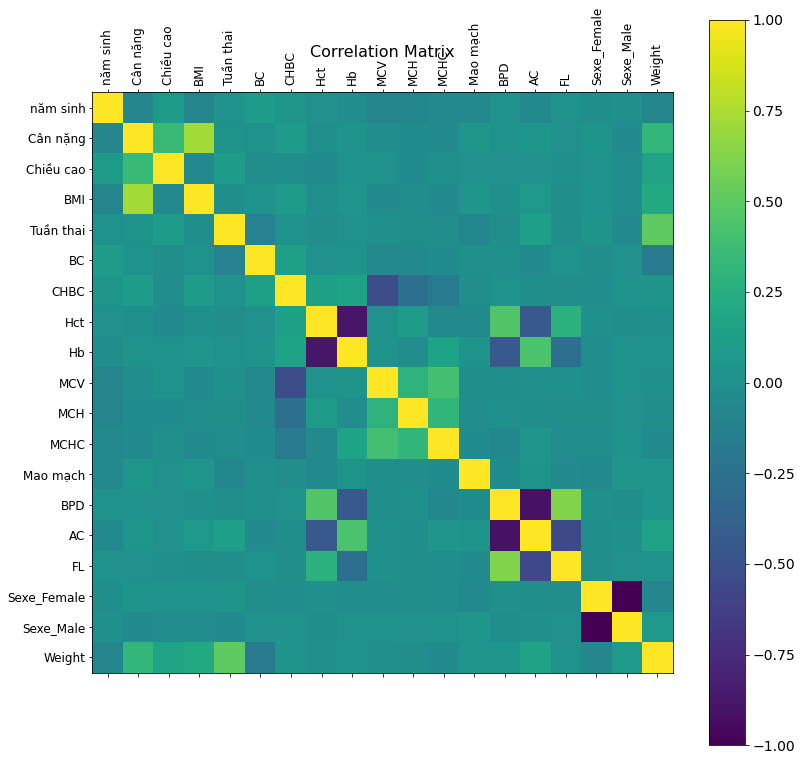

In [123]:
# correlation matrix
f = pyplot.figure(figsize=(13, 13))
pyplot.matshow(df.corr(), fignum=f.number)
pyplot.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=90)
pyplot.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = pyplot.colorbar()
cb.ax.tick_params(labelsize=14)
pyplot.title('Correlation Matrix', fontsize=16);

Next I scale all variables

In [125]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_fin_scaled = df.copy()
df_fin_scaled = scaler.fit_transform(df_fin_scaled)

Split test and train dataset

In [127]:
X = df_fin_scaled[:,0:17]
Y = df_fin_scaled[:,18]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Build models

In [128]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

num_folds = 10
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

models = []
models.append(('Ridge regression', Ridge()))
models.append(('Lasso regression', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

scoring = 'neg_mean_squared_error'
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Ridge regression: -0.005164 (0.001067)
Lasso regression: -0.009168 (0.001962)
ElasticNet: -0.009168 (0.001962)
DecisionTreeRegressor: -0.009178 (0.001217)
SVR: -0.005189 (0.001123)


Ridge regression is among the best one. Next step is tune params for it.

In [135]:
from sklearn.model_selection import RepeatedKFold
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, Y_train)

# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -0.005
Config: {'alpha': 0.26}


Evaluate the best Ridge regression model

In [137]:
model = Ridge(alpha=0.26)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

scaler = MinMaxScaler()
x = df["Weight"].values
scaler.fit_transform(x.reshape(-1, 1))
Y_validation_inv = scaler.inverse_transform(Y_validation.reshape(1, -1))[0,:].tolist()
Y_predictions_inv = scaler.inverse_transform(predictions.reshape(1, -1))[0,:].tolist()
res = pd.DataFrame(list(zip(Y_validation_inv, Y_predictions_inv)), columns =['Y_validation', 'predictions']) 

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_validation_inv,Y_predictions_inv))

335.91987964075287